In [1]:
#Predicting the upward and downward trend in Google stock price using RNN(LSTM's)
#LSTM's perform way better than traditional RNN
#We'll train our model on 5 yrs of google stock prices[2012-2016] and 

In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
print(dataset_train.head())

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800


In [5]:
#training_set = np.array(dataset_train.drop(['Date','High','Low','Close','Volume'],1))
training_set = np.array(dataset_train.iloc[:,1:2])#or we can use this

In [6]:
print(training_set[:5])

[[325.25]
 [331.27]
 [329.83]
 [328.34]
 [322.04]]


In [7]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range =(0,1))#all our stock prices will be in b/w (0,1)
training_set_scaled = sc.fit_transform(training_set)

In [8]:
print(training_set_scaled[0])#all our stock prices have been normalized

[0.08581368]


In [9]:
#what our RNN will need to remember when predicting the next stock price or giving our RNN the right no. of time steps
#creating a data structure with 60 timesteps and 1 output i.e. to predict each day's stock price we're going to look at the three previous month(20 days in each month[weekends are not included]) to try to predict the stock
X_train = []
y_train = []
count = 0
for i in range(60, 1258):
    X_train.append([training_set_scaled[j][0] for j in range(count,i)])
    y_train.append(training_set_scaled[i][0])
    count += 1


In [10]:
print(len(X_train))

1198


In [11]:
X_train = np.reshape(X_train, (1198, 60, 1))

In [12]:
print(X_train[0][:5])

[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]]


In [13]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout#to prevent overfitting

Using TensorFlow backend.


In [14]:
#Initializing the RNN
regressor = Sequential()#here we're not calling it a classifier because our output is continous hence we call it a regressor

In [15]:
#Adding the first LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (60, 1)))#we need high no. of neurons to capture the upward and downward trend and return sequence is set True when we want to add another LSTM layer after that(cuz we are building a stacked LSTM neural network) and in input_shape we will give last two similar arguments when we were reshaping X_train
regressor.add(Dropout(0.2))#20% neurons of the LSTM layer will be ignored during the training(in both fwd and back propagation) i.e. 0.2*50=10 neurons will be ignored

In [16]:
#Adding the second LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
#Adding the third LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
#Adding the fourth LSTM layer and some Dropout Regularisation
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

In [19]:
#Adding the output layer
regressor.add(Dense(units = 1))

In [20]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')#since we have regressor model we can use mse as loss and for optimizer we can use RMSprop also

In [21]:
#Fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0424
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0062A: 2s - 
Epoch 3/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0046
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0040
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0037
Epoch 11/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================] - 8s 7ms

1198/1198 [==============================] - 9s 7ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0013
Epoch 99/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0014


In [43]:
#Part 3 = MAking the predictions and visualising the results
#Getting the real stock price of 2017 and comparing it with out predicted stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = np.array(dataset_test.iloc[:,1:2])

In [44]:
print(real_stock_price[0:5])

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]]


In [45]:
#Getting the predicted stock price of 2017
#we need to concatinate the training set and test set because to predict the stock price of last day of test set, we need previous 30 days stock price which will come from both training set and test set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)#row-wise
inputs = np.array(dataset_total[len(dataset_total)-len(dataset_test)-60 :])
inputs = inputs.reshape(-1,1)
#scaling the new data
inputs = sc.transform(inputs)#here we are'nt using fit_transform because our sc object was already fitted to the training set and we must apply the same scaling which was applied to the training_set

In [46]:
#creating a data structure with 60 timesteps i.e. to predict each day's stock price we're going to look at the three previous month(20 days in each month[weekends are not included]) to try to predict the stock
X_test = []
count = 0
for i in range(60, 80):#here 80 bcz we only need to predict for 20 financial days
    X_test.append([inputs[j][0] for j in range(count,i)])
    count += 1

In [47]:
print(len(X_test))

20


In [54]:
#getting the right 3d shape as required by the neural network
X_test = np.reshape(X_test, (20, 60, 1))

In [49]:
predicted_stock_price = regressor.predict(X_test)
#inversing the scaling effect to get the real predicted stock price
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [50]:
print(predicted_stock_price)

[[799.4109 ]
 [796.4095 ]
 [797.46643]
 [799.47284]
 [803.39294]
 [809.9477 ]
 [815.1844 ]
 [816.30774]
 [815.8693 ]
 [815.5506 ]
 [815.7069 ]
 [815.92084]
 [816.0992 ]
 [816.9743 ]
 [818.0916 ]
 [823.67554]
 [831.41016]
 [838.9971 ]
 [841.91785]
 [835.134  ]]


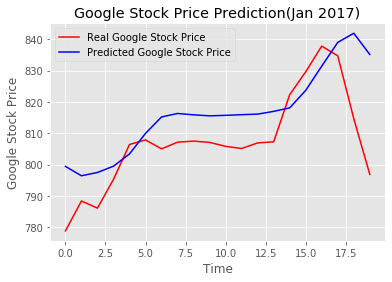

In [52]:
#Visualising the final results
from matplotlib import style
style.use('ggplot')

plt.plot(real_stock_price, color ='red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.xlabel('Time')
plt.title('Google Stock Price Prediction(Jan 2017)')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()